In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#data
x_train_smpl = "X_train_random_reduced.csv"
x_test_smpl = "X_test_random_reduced.csv"
y_train_smpl = "y_train_random_reduced.csv"
y_test_smpl = "y_test_random_reduced.csv"

x_train_data = pd.read_csv(x_train_smpl)
y_train_data = pd.read_csv(y_train_smpl)
x_test_data = pd.read_csv(x_test_smpl)
y_test_data = pd.read_csv(y_test_smpl)

X_train = x_train_data.values
y_train = y_train_data.values.ravel()

X_test = x_test_data.values
y_test = y_test_data.values.ravel()

class_names = np.array(['20 kph','30 kph','50 kph','60 kph','70 kph','left turn', 'right turn',
                'predestrian crossing', 'children', 'cycle route ahead'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((688, 1225), (688,), (12088, 1225), (12088,))

In [3]:
image_size = 35
num_labels = class_names.size
num_channels = 1

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

X_train, y_train = reformat(X_train, y_train)
X_test, y_test = reformat(X_test, y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((688, 35, 35, 1), (688, 10), (12088, 35, 35, 1), (12088, 10))

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=3, activation= 'relu', input_shape=(35,35,1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(10, activation= 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Train on 688 samples, validate on 12088 samples
Epoch 1/10
688/688 [==============================] - 5s 7ms/sample - loss: 7.9143 - accuracy: 0.2456 - val_loss: 2.2826 - val_accuracy: 0.2771
Epoch 2/10
688/688 [==============================] - 4s 6ms/sample - loss: 1.8676 - accuracy: 0.3503 - val_loss: 1.8428 - val_accuracy: 0.3672
Epoch 3/10
688/688 [==============================] - 4s 6ms/sample - loss: 1.6243 - accuracy: 0.3968 - val_loss: 1.6297 - val_accuracy: 0.4229
Epoch 4/10
688/688 [==============================] - 4s 6ms/sample - loss: 1.2825 - accuracy: 0.5480 - val_loss: 1.3879 - val_accuracy: 0.5639
Epoch 5/10
688/688 [==============================] - 4s 6ms/sample - loss: 0.9907 - accuracy: 0.6773 - val_loss: 1.0771 - val_accuracy: 0.6578
Epoch 6/10
688/688 [==============================] - 5s 7ms/sample - loss: 0.7477 - accuracy: 0.7645 - val_loss: 0.9878 - val_accuracy: 0.6971
Epoch 7/10
688/688 [==============================] - 5s 7ms/sample - loss: 0.5050 - acc

12088/12088 - 4s - loss: 0.6295 - accuracy: 0.8441


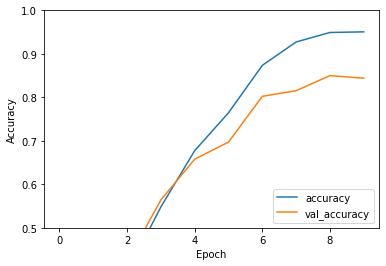

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [7]:
pred_probs = np.argmax(y_test, axis=1)

pred_class = model.predict_classes(X_test, verbose=0)
pred_class.flatten()

pred_probs.shape, pred_class.shape, pred_class[1], pred_probs[1]

((12088,), (12088,), 9, 9)

In [8]:
print(classification_report(pred_probs, pred_class))

              precision    recall  f1-score   support

           0       0.94      0.32      0.48       254
           1       0.73      0.95      0.83      2782
           2       0.92      0.82      0.86      2839
           3       0.92      0.91      0.91      1745
           4       0.94      0.84      0.89      2493
           5       0.97      0.58      0.72       259
           6       0.68      0.89      0.77       425
           7       0.88      0.52      0.65       292
           8       0.88      0.79      0.83       654
           9       0.65      0.83      0.73       345

    accuracy                           0.84     12088
   macro avg       0.85      0.74      0.77     12088
weighted avg       0.86      0.84      0.84     12088



In [9]:
cm = confusion_matrix(pred_probs, pred_class, labels = np.unique(pred_probs))

print(cm)

[[  82  166    2    0    4    0    0    0    0    0]
 [   4 2638   92   23   22    0    0    0    0    3]
 [   1  393 2323   72   42    2    4    0    0    2]
 [   0   97   28 1587   24    0    0    1    4    4]
 [   0  297   75   24 2091    0    4    0    0    2]
 [   0    0    2    1    1  149   17   15   19   55]
 [   0   11    4    1    4    0  378    1   17    9]
 [   0    1    4    4   14    0   76  151    4   38]
 [   0   10    2   10    7    2   66    0  516   41]
 [   0    0    4    6    4    0   11    4   28  288]]
